In [33]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pycountry
from matplotlib.colors import LogNorm

In [34]:
df =  pd.read_csv('tweet_places.csv',  sep=';;', on_bad_lines='skip',lineterminator='\r', engine ='python')
df.head(10)

,id,tweet,full_name,country,country_code
0,1,561675512373067776,"Rio Grande do Sul, Brasil",Brasile,BR
1,2,561675512373067776,"São Vicente, Brasil",Brasile,BR
2,3,561675512373067776,"San Paolo, Brasile",Brasile,BR
3,4,561675512373067776,"Resistencia, Argentina",Argentina,AR
4,5,561736382058889216,"Goiânia, Brasil",Brasile,BR
5,6,561838979599712256,"Turvo, Brasil",Brasile,BR
6,7,561884512255500288,"Campo Bom, Brasil",Brasile,BR
7,8,561884512255500288,"Mogi das Cruzes, Brasil",Brasile,BR
8,9,561884512255500288,"Colombia Britannica, Canadà",Canadà,CA
9,10,561917018249891840,"Sapiranga, Brasil",Brasile,BR


In [35]:
country_code_counts = df['country_code'].value_counts().reset_index()
country_code_counts.columns = ['country_code', 'frequency']

# Sort the values by frequency, from the most to last frequent 
country_code_counts = country_code_counts.sort_values(by='frequency', ascending=False)

# Convert the result to a list
country_code_freq_list = country_code_counts.to_records(index=False).tolist()

# Print the list
print(country_code_freq_list)

[('BR', 11286), ('PT', 875), ('US', 511), ('AR', 185), ('CA', 152), ('ES', 135), ('GB', 124), ('DE', 98), ('FR', 91), ('IE', 90), ('IT', 60), ('AU', 33), ('MX', 33), ('CL', 30), ('NL', 29), ('JP', 25), ('CH', 19), ('VE', 18), ('CO', 16), ('PE', 15), ('BE', 14), ('PY', 12), ('NZ', 11), ('AO', 11), ('DZ', 11), ('UY', 11), ('RU', 11), ('SE', 11), ('GR', 10), ('MZ', 10), ('MA', 9), ('IL', 9), ('ZA', 8), ('EC', 6), ('TH', 6), ('HK', 6), ('VA', 5), ('DO', 5), ('DK', 5), ('VN', 4), ('NO', 4), ('PA', 4), ('SG', 4), ('SY', 4), ('LB', 4), ('CN', 4), ('TR', 3), ('GT', 3), ('AT', 3), ('LU', 3), ('HU', 3), ('UA', 3), ('KR', 3), ('BO', 3), ('JO', 3), ('SA', 2), ('HR', 2), ('CU', 2), ('MT', 2), ('MD', 2), ('IQ', 2), ('ID', 2), ('MO', 2), ('AE', 2), ('EG', 2), ('QA', 2), ('AZ', 2), ('RO', 2), ('GW', 1), ('MY', 1), ('EE', 1), ('IR', 1), ('TT', 1), ('CZ', 1), ('MM', 1), ('LT', 1), ('KE', 1), ('IS', 1), ('PL', 1), ('BA', 1), ('CD', 1), ('UG', 1), ('BG', 1), ('PF', 1), ('IN', 1), ('FI', 1), ('PH', 1), ('M

In [36]:
# Calculate the total number of occurrences
total_occurrences = country_code_counts['frequency'].sum()

# Calculate the percentage 
country_code_counts['percentage'] = (country_code_counts['frequency'] / total_occurrences) * 100

# descending order
country_code_counts = country_code_counts.sort_values(by='frequency', ascending=False)

# Create a new DataFrame with columns 'Country Code', 'Frequency', and 'Percentage'
result_df = pd.DataFrame(country_code_counts)
result_df['Percentage'] = result_df['percentage'].apply(lambda x: f"{x:.2f}%")

# Print the resulting DataFrame
print(result_df)

   country_code  frequency  percentage Percentage
0            BR      11286   80.048230     80.05%
1            PT        875    6.206114      6.21%
2            US        511    3.624371      3.62%
3            AR        185    1.312150      1.31%
4            CA        152    1.078091      1.08%
..          ...        ...         ...        ...
86           IR          1    0.007093      0.01%
87           EE          1    0.007093      0.01%
88           MY          1    0.007093      0.01%
79           GW          1    0.007093      0.01%
89           MW          1    0.007093      0.01%

[90 rows x 4 columns]


In [38]:
# converting ISO 2-letter codes to ISO 3-letter codes
country_code_iso_mapping = {}
for country_code in result_df['country_code']:
    try:
        country = pycountry.countries.get(alpha_2=country_code)
        if country:
            country_code_iso_mapping[country_code] = country.alpha_3
    except AttributeError:
        pass
    
# adding collumn wiht new code with 3 letters (https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b)
result_df['CODE'] = result_df['country_code'].map(country_code_iso_mapping)

print(result_df)

   country_code  frequency  percentage Percentage CODE
0            BR      11286   80.048230     80.05%  BRA
1            PT        875    6.206114      6.21%  PRT
2            US        511    3.624371      3.62%  USA
3            AR        185    1.312150      1.31%  ARG
4            CA        152    1.078091      1.08%  CAN
..          ...        ...         ...        ...  ...
86           IR          1    0.007093      0.01%  IRN
87           EE          1    0.007093      0.01%  EST
88           MY          1    0.007093      0.01%  MYS
79           GW          1    0.007093      0.01%  GNB
89           MW          1    0.007093      0.01%  MWI

[90 rows x 5 columns]


C:\Users\anape\AppData\Local\Temp\ipykernel_20252\2335591556.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


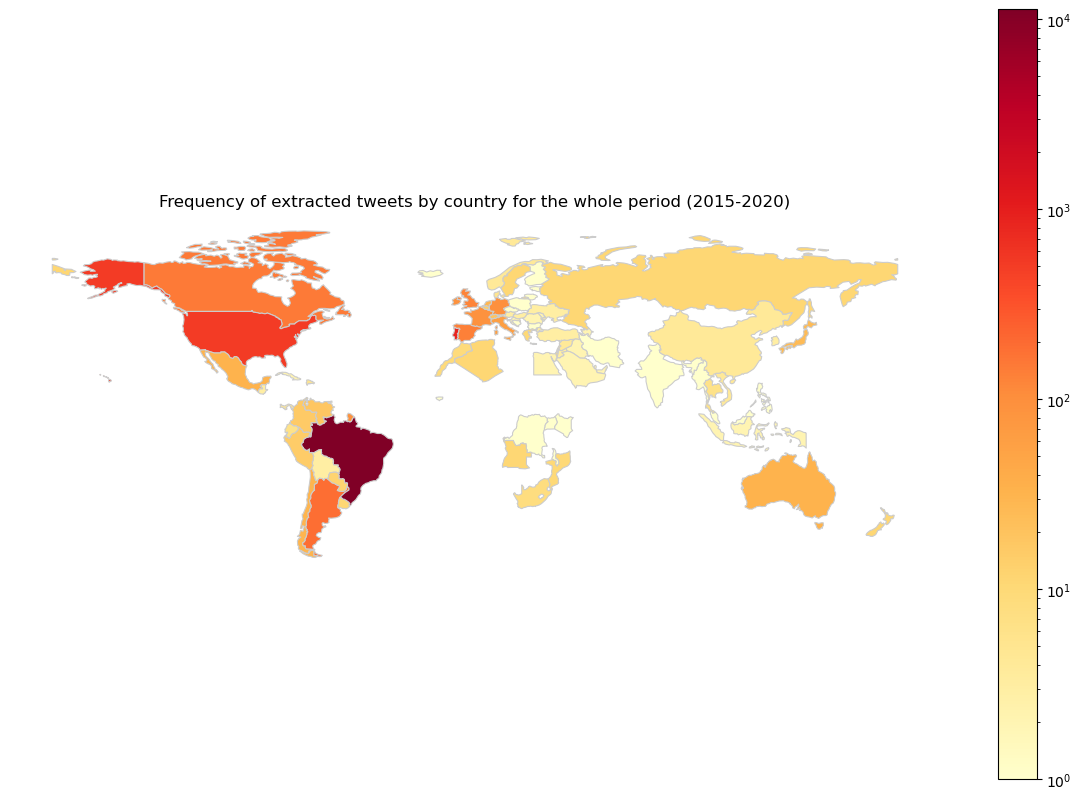

In [44]:
# Load the world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the map data with DataFrame using the 'CODE' column
merged = world.merge(result_df, left_on='iso_a3', right_on='CODE', how='left')

# Calculate a suitable range for vmin and vmax for the color scale
min_frequency = merged['frequency'].min()
max_frequency = merged['frequency'].max()
vmin = min_frequency if min_frequency > 0 else 1
vmax = max_frequency

# world map with colours based on frequency using a logarithmic scale (because the freq in BR is way bigger than others)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='frequency', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
            norm=LogNorm(vmin=vmin, vmax=vmax))
ax.set_title('Frequency of extracted tweets by country for the whole period (2015-2020)')
ax.set_axis_off()

# Show the plot
plt.show()